<a href="https://colab.research.google.com/github/raghul-2005-tech/Customer-Churn-Prediction/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1:** Data preprocessing(Cleaning the data)

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('/content/Telco_Customer_Churn_Dataset  (1).csv')
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
df=df.drop('customerID',axis=1)
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Task 2 & 3:** Data Splitting & Feature Selection

In [6]:
from sklearn.model_selection import train_test_split
X=df.drop('Churn',axis=1)
y=df['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("The Training data and testing data is splitted in the ratio of 80,20")

The Training data and testing data is splitted in the ration of 80,20


**Task 4 & 5:** Model Selection & Training


In [7]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
print("The model has finished training and learning from the data")

The model has finished training and learning from the data


**Task 6:**Model Evaluation

Model Accuracy: 79.56%

Detailed Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



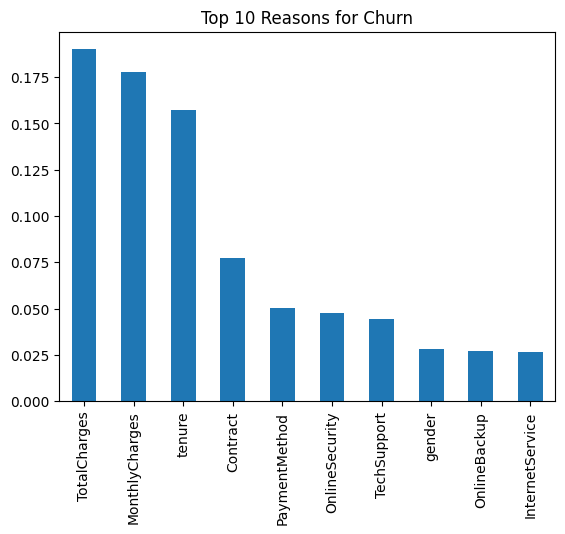

In [8]:
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
predictions=model.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nDetailed Report:\n",classification_report(y_test,predictions))
importances=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
importances.head(10).plot(kind='bar',title='Top 10 Reasons for Churn')
plt.show()